### Compute the end-end distance at each time, and the radius of gyration at each time

In [1]:
# this notebook is for plotting
# the end to end analysis
import numpy as np
import matplotlib.pyplot as plt
#load mdtraj
import mdtraj as md

In [2]:
import os
# change python directory to /home/gmh4/projects/CompLab/comp-lab-class
# os.chdir('/scratch/work/courses/CHEM-GA-2671-2022fa/wz2449/class2/comp-lab-class/Week2/')
path = '/scratch/work/courses/CHEM-GA-2671-2022fa/wz2449/main/comp-lab-class/Week2/'

### Print the total number of hydrogen bonds.

In [3]:
protein = md.load_pdb(path + 'Data/1ubq_wH.pdb')
hbonds = md.baker_hubbard(protein, periodic=False)
label = lambda hbond : '%s -- %s' % (protein.topology.atom(hbond[0]), protein.topology.atom(hbond[2]))
for hbond in hbonds:
    print(label(hbond))

hbonds = hbonds.tolist()
hbonds_num = len(hbonds)
print(f"The total number of hydrogen bonds is {hbonds_num}.")

MET1-N -- VAL17-O
ILE3-N -- LEU15-O
PHE4-N -- SER65-O
VAL5-N -- ILE13-O
LYS6-N -- LEU67-O
THR7-N -- LYS11-O
THR9-N -- THR7-OG1
GLY10-N -- THR7-O
ILE13-N -- VAL5-O
LEU15-N -- ILE3-O
VAL17-N -- MET1-O
GLU18-N -- ASP21-OD2
ASP21-N -- GLU18-O
ILE23-N -- ARG54-O
GLU24-N -- ASP52-O
ASN25-N -- THR22-O
ASN25-N -- THR22-OG1
VAL26-N -- THR22-O
LYS27-N -- ILE23-O
LYS27-NZ -- ASP52-OD2
ALA28-N -- GLU24-O
LYS29-N -- ASN25-O
LYS29-NZ -- GLU16-O
ILE30-N -- VAL26-O
GLN31-N -- LYS27-O
ASP32-N -- ALA28-O
LYS33-N -- LYS29-O
GLU34-N -- ILE30-O
GLY35-N -- GLN31-O
GLN40-N -- PRO37-O
GLN41-N -- PRO38-O
GLN41-NE2 -- ILE36-O
GLN41-NE2 -- LYS27-O
ARG42-N -- VAL70-O
ARG42-NE -- GLN49-NE2
ILE44-N -- HIS68-O
PHE45-N -- LYS48-O
LYS48-N -- PHE45-O
LYS48-NZ -- ALA46-O
LEU50-N -- LEU43-O
GLU51-N -- TYR59-OH
ARG54-N -- GLU51-O
THR55-N -- ASP58-OD1
LEU56-N -- ASP21-O
SER57-N -- PRO19-O
ASP58-N -- THR55-O
ASP58-N -- THR55-OG1
TYR59-N -- LEU56-O
ASN60-N -- SER57-O
ILE61-N -- LEU56-O
GLU64-N -- GLN2-O
SER65-N -- GLN62-O
LE

### Compute the number of helical amino acids

In [4]:
A = md.compute_dssp(protein)
B = A.tolist()
C = B[0]
Helix_num = C.count('H')
print(f"The number of helical amino acids is {Helix_num}.")

The number of helical amino acids is 18.


### Part 6: end-end distance and radius of gyration.

In [5]:
traj = md.load_xtc(path + 'Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc', top= path + 'Data/1hz3_T310.start.nowater.gro')

In [6]:
def end_end(traj):
    """Compute the end to end distance of a trajectory"""
    # get the positions of the first and last atoms
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atoms
    dist = np.linalg.norm(first - last, axis=1)
    return dist

mean =  2.7530813
std =  0.56021696


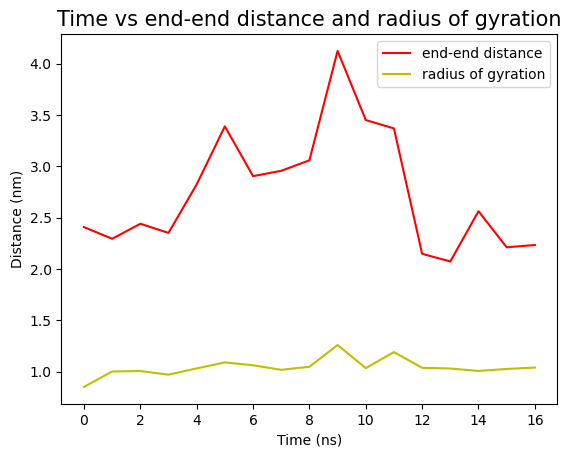

In [7]:
# compute the end to end distance
dist = end_end(traj)

# print the mean and standard deviation
print('mean = ', np.mean(dist))
print('std = ', np.std(dist))

# compute the radius of gyratin
radius = md.compute_rg(traj)

# plot the distribution
plt.figure()
plt.plot(traj.time/1000, dist, color='r', label='end-end distance')
plt.plot(traj.time/1000, radius, color='y', label='radius of gyration')
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('Distance (nm)')
plt.title("Time vs end-end distance and radius of gyration", fontsize=15)
plt.savefig("Time_vs_E2E_dist_and_rad_gy.png", dpi=500, bbox_inches='tight')
plt.show()

### Normalized histogram of end-end distance and radius of gyration

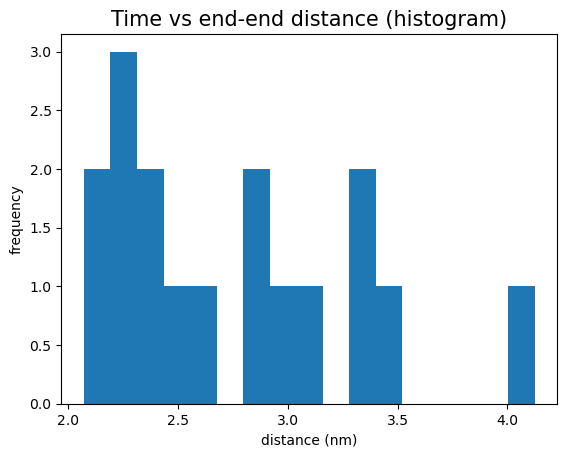

In [11]:
plt.figure()
plt.hist(dist, bins=17)
plt.xlabel('distance (nm)')
plt.ylabel('frequency')
plt.title("Time vs end-end distance (histogram)", fontsize=15)
plt.savefig("Time_vs_E2E_dist_hist.png", dpi=500, bbox_inches='tight')
plt.show()

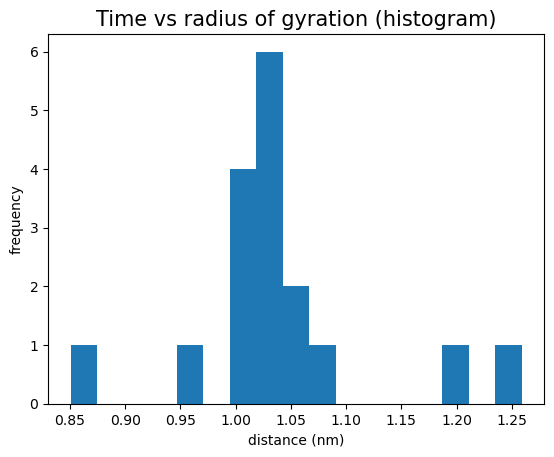

In [10]:
plt.figure()
plt.hist(radius, bins=17)
plt.xlabel('distance (nm)')
plt.ylabel('frequency')
plt.title("Time vs radius of gyration (histogram)", fontsize=15)
plt.savefig("Time_vs_rad_gy_hist.png", dpi=500, bbox_inches='tight')
plt.show()